# Import

In [92]:
# !pip install -q transformers accelerate sentencepiece
# !huggingface-cli login
from transformers import AutoTokenizer
import transformers
import torch
import matplotlib.pyplot as plt

# 텍스트 생성

## Load a model & tokenizer

### chat version은 txt 주고 받는 모델

In [59]:
model = "meta-llama/Llama-2-7b-chat-hf"

`AutoTokenizer.from_pretrained`

- 사전 훈련된 model 가져와
- 인증한 tokenizer를 자동으로 선택하고 사용

*꼭 모델을 지정해주고 입력, 바로 모델을 pretrainded에 넣으면 에러 뜸*

In [60]:
tokenizer = AutoTokenizer.from_pretrained(
    model,
    use_auth_token=True,
)

사용가능한 pretrained된 model들 종류 아직 llama2는 업데이트되지 않은듯

    - **albert** -- [`AlbertTokenizer`] or [`AlbertTokenizerFast`] (ALBERT model)
    - **align** -- [`BertTokenizer`] or [`BertTokenizerFast`] (ALIGN model)
    - **bart** -- [`BartTokenizer`] or [`BartTokenizerFast`] (BART model)
    - **barthez** -- [`BarthezTokenizer`] or [`BarthezTokenizerFast`] (BARThez model)
    - **bartpho** -- [`BartphoTokenizer`] (BARTpho model)
    - **bert** -- [`BertTokenizer`] or [`BertTokenizerFast`] (BERT model)
    - **bert-generation** -- [`BertGenerationTokenizer`] (Bert Generation model)
    - **bert-japanese** -- [`BertJapaneseTokenizer`] (BertJapanese model)
    - **bertweet** -- [`BertweetTokenizer`] (BERTweet model)
    - **big_bird** -- [`BigBirdTokenizer`] or [`BigBirdTokenizerFast`] (BigBird model)
    - **bigbird_pegasus** -- [`PegasusTokenizer`] or [`PegasusTokenizerFast`] (BigBird-Pegasus model)
    - **biogpt** -- [`BioGptTokenizer`] (BioGpt model)
    - **blenderbot** -- [`BlenderbotTokenizer`] or [`BlenderbotTokenizerFast`] (Blenderbot model)
    - **blenderbot-small** -- [`BlenderbotSmallTokenizer`] (BlenderbotSmall model)
    - **blip** -- [`BertTokenizer`] or [`BertTokenizerFast`] (BLIP model)
    - **blip-2** -- [`GPT2Tokenizer`] or [`GPT2TokenizerFast`] (BLIP-2 model)
    - **bloom** -- [`BloomTokenizerFast`] (BLOOM model)
    - **bridgetower** -- [`RobertaTokenizer`] or [`RobertaTokenizerFast`] (BridgeTower model)
    - **byt5** -- [`ByT5Tokenizer`] (ByT5 model)
    - **camembert** -- [`CamembertTokenizer`] or [`CamembertTokenizerFast`] (CamemBERT model)
    - **canine** -- [`CanineTokenizer`] (CANINE model)
    - **chinese_clip** -- [`BertTokenizer`] or [`BertTokenizerFast`] (Chinese-CLIP model)
    - **clap** -- [`RobertaTokenizer`] or [`RobertaTokenizerFast`] (CLAP model)
    - **clip** -- [`CLIPTokenizer`] or [`CLIPTokenizerFast`] (CLIP model)
    - **clipseg** -- [`CLIPTokenizer`] or [`CLIPTokenizerFast`] (CLIPSeg model)
    - **codegen** -- [`CodeGenTokenizer`] or [`CodeGenTokenizerFast`] (CodeGen model)
    - **convbert** -- [`ConvBertTokenizer`] or [`ConvBertTokenizerFast`] (ConvBERT model)
    - **cpm** -- [`CpmTokenizer`] or [`CpmTokenizerFast`] (CPM model)
    - **cpmant** -- [`CpmAntTokenizer`] (CPM-Ant model)
    - **ctrl** -- [`CTRLTokenizer`] (CTRL model)
    - **data2vec-text** -- [`RobertaTokenizer`] or [`RobertaTokenizerFast`] (Data2VecText model)
    - **deberta** -- [`DebertaTokenizer`] or [`DebertaTokenizerFast`] (DeBERTa model)
    - **deberta-v2** -- [`DebertaV2Tokenizer`] or [`DebertaV2TokenizerFast`] (DeBERTa-v2 model)
    - **distilbert** -- [`DistilBertTokenizer`] or [`DistilBertTokenizerFast`] (DistilBERT model)
    - **dpr** -- [`DPRQuestionEncoderTokenizer`] or [`DPRQuestionEncoderTokenizerFast`] (DPR model)
    - **electra** -- [`ElectraTokenizer`] or [`ElectraTokenizerFast`] (ELECTRA model)
    - **ernie** -- [`BertTokenizer`] or [`BertTokenizerFast`] (ERNIE model)
    - **ernie_m** -- [`ErnieMTokenizer`] (ErnieM model)
    - **esm** -- [`EsmTokenizer`] (ESM model)
    - **flaubert** -- [`FlaubertTokenizer`] (FlauBERT model)
    - **fnet** -- [`FNetTokenizer`] or [`FNetTokenizerFast`] (FNet model)
    - **fsmt** -- [`FSMTTokenizer`] (FairSeq Machine-Translation model)
    - **funnel** -- [`FunnelTokenizer`] or [`FunnelTokenizerFast`] (Funnel Transformer model)
    - **git** -- [`BertTokenizer`] or [`BertTokenizerFast`] (GIT model)
    - **gpt-sw3** -- [`GPTSw3Tokenizer`] (GPT-Sw3 model)
    - **gpt2** -- [`GPT2Tokenizer`] or [`GPT2TokenizerFast`] (OpenAI GPT-2 model)
    - **gpt_bigcode** -- [`GPT2Tokenizer`] or [`GPT2TokenizerFast`] (GPTBigCode model)
    - **gpt_neo** -- [`GPT2Tokenizer`] or [`GPT2TokenizerFast`] (GPT Neo model)
    - **gpt_neox** -- [`GPTNeoXTokenizerFast`] (GPT NeoX model)
    - **gpt_neox_japanese** -- [`GPTNeoXJapaneseTokenizer`] (GPT NeoX Japanese model)
    - **gptj** -- [`GPT2Tokenizer`] or [`GPT2TokenizerFast`] (GPT-J model)
    - **gptsan-japanese** -- [`GPTSanJapaneseTokenizer`] (GPTSAN-japanese model)
    - **groupvit** -- [`CLIPTokenizer`] or [`CLIPTokenizerFast`] (GroupViT model)
    - **herbert** -- [`HerbertTokenizer`] or [`HerbertTokenizerFast`] (HerBERT model)
    - **hubert** -- [`Wav2Vec2CTCTokenizer`] (Hubert model)
    - **ibert** -- [`RobertaTokenizer`] or [`RobertaTokenizerFast`] (I-BERT model)
    - **jukebox** -- [`JukeboxTokenizer`] (Jukebox model)
    - **layoutlm** -- [`LayoutLMTokenizer`] or [`LayoutLMTokenizerFast`] (LayoutLM model)
    - **layoutlmv2** -- [`LayoutLMv2Tokenizer`] or [`LayoutLMv2TokenizerFast`] (LayoutLMv2 model)
    - **layoutlmv3** -- [`LayoutLMv3Tokenizer`] or [`LayoutLMv3TokenizerFast`] (LayoutLMv3 model)
    - **layoutxlm** -- [`LayoutXLMTokenizer`] or [`LayoutXLMTokenizerFast`] (LayoutXLM model)
    - **led** -- [`LEDTokenizer`] or [`LEDTokenizerFast`] (LED model)
    - **lilt** -- [`LayoutLMv3Tokenizer`] or [`LayoutLMv3TokenizerFast`] (LiLT model)
    - **llama** -- [`LlamaTokenizer`] or [`LlamaTokenizerFast`] (LLaMA model)
    - **longformer** -- [`LongformerTokenizer`] or [`LongformerTokenizerFast`] (Longformer model)
    - **longt5** -- [`T5Tokenizer`] or [`T5TokenizerFast`] (LongT5 model)
    - **luke** -- [`LukeTokenizer`] (LUKE model)
    - **lxmert** -- [`LxmertTokenizer`] or [`LxmertTokenizerFast`] (LXMERT model)
    - **m2m_100** -- [`M2M100Tokenizer`] (M2M100 model)
    - **marian** -- [`MarianTokenizer`] (Marian model)
    - **mbart** -- [`MBartTokenizer`] or [`MBartTokenizerFast`] (mBART model)
    - **mbart50** -- [`MBart50Tokenizer`] or [`MBart50TokenizerFast`] (mBART-50 model)
    - **mega** -- [`RobertaTokenizer`] or [`RobertaTokenizerFast`] (MEGA model)
    - **megatron-bert** -- [`BertTokenizer`] or [`BertTokenizerFast`] (Megatron-BERT model)
    - **mgp-str** -- [`MgpstrTokenizer`] (MGP-STR model)
    - **mluke** -- [`MLukeTokenizer`] (mLUKE model)
    - **mobilebert** -- [`MobileBertTokenizer`] or [`MobileBertTokenizerFast`] (MobileBERT model)
    - **mpnet** -- [`MPNetTokenizer`] or [`MPNetTokenizerFast`] (MPNet model)
    - **mt5** -- [`MT5Tokenizer`] or [`MT5TokenizerFast`] (MT5 model)
    - **mvp** -- [`MvpTokenizer`] or [`MvpTokenizerFast`] (MVP model)
    - **nezha** -- [`BertTokenizer`] or [`BertTokenizerFast`] (Nezha model)
    - **nllb** -- [`NllbTokenizer`] or [`NllbTokenizerFast`] (NLLB model)
    - **nllb-moe** -- [`NllbTokenizer`] or [`NllbTokenizerFast`] (NLLB-MOE model)
    - **nystromformer** -- [`AlbertTokenizer`] or [`AlbertTokenizerFast`] (Nyströmformer model)
    - **oneformer** -- [`CLIPTokenizer`] or [`CLIPTokenizerFast`] (OneFormer model)
    - **openai-gpt** -- [`OpenAIGPTTokenizer`] or [`OpenAIGPTTokenizerFast`] (OpenAI GPT model)
    - **opt** -- [`GPT2Tokenizer`] or [`GPT2TokenizerFast`] (OPT model)
    - **owlvit** -- [`CLIPTokenizer`] or [`CLIPTokenizerFast`] (OWL-ViT model)
    - **pegasus** -- [`PegasusTokenizer`] or [`PegasusTokenizerFast`] (Pegasus model)
    - **pegasus_x** -- [`PegasusTokenizer`] or [`PegasusTokenizerFast`] (PEGASUS-X model)
    - **perceiver** -- [`PerceiverTokenizer`] (Perceiver model)
    - **phobert** -- [`PhobertTokenizer`] (PhoBERT model)
    - **pix2struct** -- [`T5Tokenizer`] or [`T5TokenizerFast`] (Pix2Struct model)
    - **plbart** -- [`PLBartTokenizer`] (PLBart model)
    - **prophetnet** -- [`ProphetNetTokenizer`] (ProphetNet model)
    - **qdqbert** -- [`BertTokenizer`] or [`BertTokenizerFast`] (QDQBert model)
    - **rag** -- [`RagTokenizer`] (RAG model)
    - **realm** -- [`RealmTokenizer`] or [`RealmTokenizerFast`] (REALM model)
    - **reformer** -- [`ReformerTokenizer`] or [`ReformerTokenizerFast`] (Reformer model)
    - **rembert** -- [`RemBertTokenizer`] or [`RemBertTokenizerFast`] (RemBERT model)
    - **retribert** -- [`RetriBertTokenizer`] or [`RetriBertTokenizerFast`] (RetriBERT model)
    - **roberta** -- [`RobertaTokenizer`] or [`RobertaTokenizerFast`] (RoBERTa model)
    - **roberta-prelayernorm** -- [`RobertaTokenizer`] or [`RobertaTokenizerFast`] (RoBERTa-PreLayerNorm model)
    - **roc_bert** -- [`RoCBertTokenizer`] (RoCBert model)
    - **roformer** -- [`RoFormerTokenizer`] or [`RoFormerTokenizerFast`] (RoFormer model)
    - **rwkv** -- [`GPTNeoXTokenizerFast`] (RWKV model)
    - **speech_to_text** -- [`Speech2TextTokenizer`] (Speech2Text model)
    - **speech_to_text_2** -- [`Speech2Text2Tokenizer`] (Speech2Text2 model)
    - **speecht5** -- [`SpeechT5Tokenizer`] (SpeechT5 model)
    - **splinter** -- [`SplinterTokenizer`] or [`SplinterTokenizerFast`] (Splinter model)
    - **squeezebert** -- [`SqueezeBertTokenizer`] or [`SqueezeBertTokenizerFast`] (SqueezeBERT model)
    - **switch_transformers** -- [`T5Tokenizer`] or [`T5TokenizerFast`] (SwitchTransformers model)
    - **t5** -- [`T5Tokenizer`] or [`T5TokenizerFast`] (T5 model)
    - **tapas** -- [`TapasTokenizer`] (TAPAS model)
    - **tapex** -- [`TapexTokenizer`] (TAPEX model)
    - **transfo-xl** -- [`TransfoXLTokenizer`] (Transformer-XL model)
    - **vilt** -- [`BertTokenizer`] or [`BertTokenizerFast`] (ViLT model)
    - **visual_bert** -- [`BertTokenizer`] or [`BertTokenizerFast`] (VisualBERT model)
    - **wav2vec2** -- [`Wav2Vec2CTCTokenizer`] (Wav2Vec2 model)
    - **wav2vec2-conformer** -- [`Wav2Vec2CTCTokenizer`] (Wav2Vec2-Conformer model)
    - **wav2vec2_phoneme** -- [`Wav2Vec2PhonemeCTCTokenizer`] (Wav2Vec2Phoneme model)
    - **whisper** -- [`WhisperTokenizer`] or [`WhisperTokenizerFast`] (Whisper model)
    - **xclip** -- [`CLIPTokenizer`] or [`CLIPTokenizerFast`] (X-CLIP model)
    - **xglm** -- [`XGLMTokenizer`] or [`XGLMTokenizerFast`] (XGLM model)
    - **xlm** -- [`XLMTokenizer`] (XLM model)
    - **xlm-prophetnet** -- [`XLMProphetNetTokenizer`] (XLM-ProphetNet model)
    - **xlm-roberta** -- [`XLMRobertaTokenizer`] or [`XLMRobertaTokenizerFast`] (XLM-RoBERTa model)
    - **xlm-roberta-xl** -- [`XLMRobertaTokenizer`] or [`XLMRobertaTokenizerFast`] (XLM-RoBERTa-XL model)
    - **xlnet** -- [`XLNetTokenizer`] or [`XLNetTokenizerFast`] (XLNet model)
    - **xmod** -- [`XLMRobertaTokenizer`] or [`XLMRobertaTokenizerFast`] (X-MOD model)
    - **yoso** -- [`AlbertTokenizer`] or [`AlbertTokenizerFast`] (YOSO model)

transformers.pipeline

- 사전 훈련된 모델과 tokenizer를 자동으로 선택
- `torch_dtype`=torch.float16 데이터 타입 지정
- `"text-generation"` 쓰면 입력 문장 이어서 텍스트 생성하도록 함.
- `device_map="auto"` 쓰면 gpu 혹은 cpu 자동 할당 

In [23]:
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    torch_dtype=torch.float16,
    device_map="auto",
)

Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]


`"text-generation"`이외에 쓸 수 있는 task option 들

 task (`str`):
            The task defining which pipeline will be returned. Currently accepted tasks are:

            - `"audio-classification"`: will return a [`AudioClassificationPipeline`].
            - `"automatic-speech-recognition"`: will return a [`AutomaticSpeechRecognitionPipeline`].
            - `"conversational"`: will return a [`ConversationalPipeline`].
            - `"depth-estimation"`: will return a [`DepthEstimationPipeline`].
            - `"document-question-answering"`: will return a [`DocumentQuestionAnsweringPipeline`].
            - `"feature-extraction"`: will return a [`FeatureExtractionPipeline`].
            - `"fill-mask"`: will return a [`FillMaskPipeline`]:.
            - `"image-classification"`: will return a [`ImageClassificationPipeline`].
            - `"image-segmentation"`: will return a [`ImageSegmentationPipeline`].
            - `"image-to-text"`: will return a [`ImageToTextPipeline`].
            - `"mask-generation"`: will return a [`MaskGenerationPipeline`].
            - `"object-detection"`: will return a [`ObjectDetectionPipeline`].
            - `"question-answering"`: will return a [`QuestionAnsweringPipeline`].
            - `"summarization"`: will return a [`SummarizationPipeline`].
            - `"table-question-answering"`: will return a [`TableQuestionAnsweringPipeline`].
            - `"text2text-generation"`: will return a [`Text2TextGenerationPipeline`].
            - `"text-classification"` (alias `"sentiment-analysis"` available): will return a
              [`TextClassificationPipeline`].
            - `"text-generation"`: will return a [`TextGenerationPipeline`]:.
            - `"token-classification"` (alias `"ner"` available): will return a [`TokenClassificationPipeline`].
            - `"translation"`: will return a [`TranslationPipeline`].
            - `"translation_xx_to_yy"`: will return a [`TranslationPipeline`].
            - `"video-classification"`: will return a [`VideoClassificationPipeline`].
            - `"visual-question-answering"`: will return a [`VisualQuestionAnsweringPipeline`].
            - `"zero-shot-classification"`: will return a [`ZeroShotClassificationPipeline`].
            - `"zero-shot-image-classification"`: will return a [`ZeroShotImageClassificationPipeline`].
            - `"zero-shot-audio-classification"`: will return a [`ZeroShotAudioClassificationPipeline`].
            - `"zero-shot-object-detection"`: will return a [`ZeroShotObjectDetectionPipeline`].

In [24]:
def gen(x, max_length=200):
    sequences = pipeline(
        x,
        do_sample=True,
        top_k=10,
        num_return_sequences=1,
        eos_token_id=tokenizer.eos_token_id,
        max_length=max_length,
    )

    return sequences[0]["generated_text"].replace(x, "")

In [ ]:
print(gen('I liked "Breaking Bad" and "Band of Brothers". Do you have any recommendations of other shows I might like?\n'))


- result

I also enjoy watching documentaries and historical dramas. Is there anything similar to those types of shows?

Answer: Based on your interest in "Breaking Bad" and "Band of Brothers," here are some other shows you might enjoy:

1. "The Sopranos" - This HBO series is a classic crime drama thatexplores the life of Tony Soprano, a mob boss struggling with personal and professional issues.

2. "Mad Men" - This AMC series takes place in the 1960s and follows the lives of advertising executives on Madison Avenue. It's a critically acclaimed drama that won numerous awards.

3. "The Wire" - This HBO series explores the drug trade in Baltimore from multiple perspectives

In [ ]:
print(gen("대한민국에서 유명한 인공지능 유튜버 3명만 나열해봐.", 500))

이들은 모두 채널 매칭 및 커버리지를 통해 다양한 형식과 테마의 비디오를 만들어내고 있습니다.
1. 송병준 (Song Byeong Jun) - 송병준은 대한민국의 가장 유명한 인공지능 유튜버 중의 한 사람입니다. 그는 다양한 테마의 비디오를 만들어내고 있습니다., including comedy skits, animation, and vlogs. He has gained millions of subscribers and views on his channel and is known for his entertaining and engaging content.
2. 박지훈 (Park Ji Hun) - Park Ji Hun is another popular AI YouTuber in South Korea. He is known for his creative and humorous content, including animation and comedy skits. His channel has gained a large following and he is widely recognized as one of the most talented AI YouTubers in the country.
3. 정하은 (Jung Ha Eun) - Jung Ha Eun is a popular AI YouTuber who is known for her beautiful animation and engaging content. She creates a wide range of videos, including animation, comedy, and vlogs. Her channel has gained a large following and she is widely recognized as one of the most talented AI YouTubers in South Korea.
These three individuals are just a few examples of the many talented AI YouTubers in South Korea. They are all known for their creativity and entertaining content, and have gained a large following on their respective channels.


In [ ]:
print(gen("유튜브 빵형의 개발도상국 채널 알아?", 500))

### 단순 txt 생성하는 모델

In [ ]:
model2 = "meta-llama/Llama-2-7b-hf"

tokenizer2 = AutoTokenizer.from_pretrained(
    model2,
    use_auth_token=True,
)

pipeline2 = transformers.pipeline(
    "text-generation",
    model=model2,
    torch_dtype=torch.float16,
    device_map="auto",
)

In [ ]:
def gen2(x, max_length=200):
    sequences = pipeline2(
        x,
        do_sample=True,
        top_k=10,
        num_return_sequences=1,
        eos_token_id=tokenizer2.eos_token_id,
        max_length=max_length,
    )

    return sequences[0]["generated_text"].replace(x, "")

In [ ]:
print(gen2('I liked "Breaking Bad" and "Band of Brothers". Do you have any recommendations of other shows I might like?\n'))

- result

할아버지 폭투리 변신 (2013.01.19)"
1. 압태, 2020. 6. 8. "아이유가 입었던 클럽웨어 판권 소송에 대한 배신 행위 야기한 사실 근거 없다". 아툴립트. 2020년 6월 28일에 원본 문서에서 보존된 문서. 2020년 6월 11일에 확인함. CS1 관리 - 추가 문서 (루마니아)(죄인에서 죄 후에 거듭된 행위를 받을 수 있음)
2. 루마니아 최고재판소는 2017. 10. 24 이격 피고인에게 적법한 재판결정을 채택했다.
3. 루마니아 최고 재판소는 이격 피고인에 대해 "배심원 투표에서 엄청난 비중으로 피고인의 재판에 관대도덕적 반격" 또는 "피고

# feature-extraction

- ref: checkpoint 사용 가능 https://huggingface.co/models?pipeline_tag=feature-extraction

- `checkpoint` 사전 학습된 모델 지정하기, 위에 400개 이상의 모델 존재
- `framework="pt"` 파이토치 이용하겠다.
    - tf라면 텐서플로우 이용하겠다.

In [195]:
checkpoint = "facebook/bart-base"
feature_extractor = transformers.pipeline("feature-extraction",framework="pt",model=checkpoint)
text = "Transformers is an awesome library!"

- 9개의 토큰으로 분리됌.
- 768차원

In [196]:
#Reducing along the first dimension to get a 768 dimensional array
feature_extractor(text,return_tensors = "pt")[0].shape

torch.Size([9, 768])

In [197]:
feature_extractor(text,return_tensors = "pt")[0].numpy().mean(axis=0).shape

(768,)

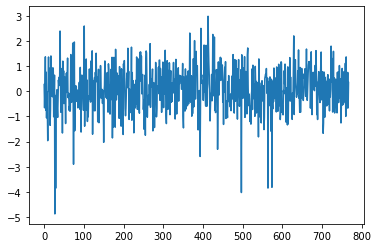

In [198]:
plt.plot(feature_extractor(text,return_tensors = "pt")[0].numpy().mean(axis=0))

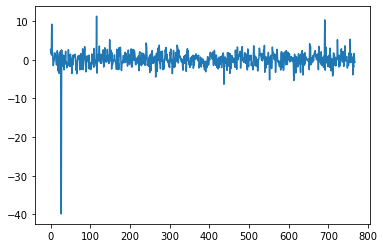

In [199]:
plt.plot(feature_extractor.predict("I like it\n")[0][0])

In [172]:
feature_extractor = transformers.pipeline("feature-extraction","microsoft/codebert-base",framework="pt")

In [173]:
#Reducing along the first dimension to get a 768 dimensional array
feature_extractor("Transformers is an awesome library!",return_tensors = "pt")[0].shape

torch.Size([9, 768])

In [174]:
feature_extractor("Transformers is an awesome library!",return_tensors = "pt")[0].numpy().mean(axis=0).shape

(768,)

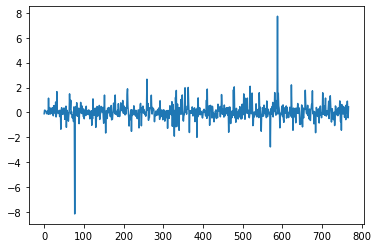

In [175]:
plt.plot(feature_extractor("Transformers is an awesome library!",return_tensors = "pt")[0].numpy().mean(axis=0))

In [186]:
feature_extractor = transformers.pipeline("feature-extraction","bert-base-uncased",framework="pt")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [190]:
feature_extractor("This is a simple test.", return_tensors=True).shape

torch.Size([1, 8, 768])

In [191]:
feature_extractor("This is a simple test.",return_tensors = True)[0].numpy().mean(axis=0).shape

(768,)

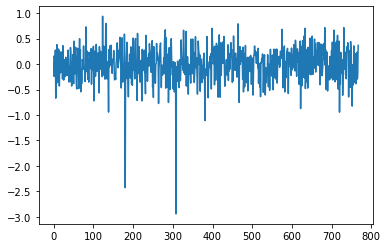

In [192]:
plt.plot(feature_extractor("This is a simple test.",return_tensors = True)[0].numpy().mean(axis=0))